In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 定義 MLP 模型
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # 初始化權重和偏差
        # 輸入到隱藏層的權重 (input_size x hidden_size)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        # 隱藏層的偏差 (1 x hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        # 隱藏層到輸出的權重 (hidden_size x output_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        # 輸出的偏差 (1 x output_size)
        self.bias_output = np.zeros((1, output_size))
    # Sigmoid 激活函數
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    # Sigmoid 的導數
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    # Softmax 函數，用於多類別分類
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))  # 防止溢出
        return exp_x / exp_x.sum(axis=1, keepdims=True)
    # 向前傳播
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden  # 計算隱藏層輸入
        self.hidden_output = self.sigmoid(self.hidden_input)  # 隱藏層的輸出
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output  # 計算最終輸出層的輸入
        self.output = self.softmax(self.output_input)  # 輸出層使用 softmax 激活函數
        return self.output
    # 向後傳播，並更新權重和偏差
    def backward(self, X, y, learning_rate):
        n_samples = X.shape[0]
        output_error = self.output - y  # 計算輸出層誤差
        # 計算隱藏層到輸出層的權重梯度
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error) / n_samples
        # 計算輸出層的偏差梯度
        d_bias_output = np.sum(output_error, axis=0, keepdims=True) / n_samples
        # 計算隱藏層的誤差，並反向傳播
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
        # 計算輸入層到隱藏層的權重梯度
        d_weights_input_hidden = np.dot(X.T, hidden_error) / n_samples
        # 計算隱藏層的偏差梯度
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True) / n_samples
        # 更新權重和偏差
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden
    # 訓練模型
    def train(self, X, y, epochs, learning_rate):
        losses = []  # 儲存每個 epoch 的損失
        accuracies = []  # 儲存每個 epoch 的準確率
        for epoch in range(epochs):
            output = self.forward(X)  # 執行前向傳播
            
            # 計算均方誤差損失 (MSE)
            loss = np.mean((y - output) ** 2)  # 均方誤差損失公式: MSE = 1/n * sum((y - y_pred)^2)
            self.backward(X, y, learning_rate)  # 執行後向傳播並更新權重
            
            losses.append(loss)
            
            # 計算準確率
            accuracy = self.evaluate(X, y)[0]
            accuracies.append(accuracy)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        
        return losses, accuracies  # 返回每個 epoch 的損失和準確率

    # 評估模型
    def evaluate(self, X, y):
        predictions = np.argmax(self.forward(X), axis=1)  # 取得最大輸出的類別索引作為預測
        true_labels = np.argmax(y, axis=1)  # 真實的類別標籤
        accuracy = np.mean(predictions == true_labels)  # 計算準確率
        # 找出正確和錯誤的樣本索引
        correct_indices = np.where(predictions == true_labels)[0]
        incorrect_indices = np.where(predictions != true_labels)[0]
        # 返回準確率、正確索引、錯誤索引、預測標籤和實際標籤
        return accuracy, correct_indices, incorrect_indices, predictions, true_labels
    # 保存模型權重
    def save_model(self, file_path):
        # 保存所有的權重和偏差到文件
        np.savez(file_path,
                 weights_input_hidden=self.weights_input_hidden,
                 bias_hidden=self.bias_hidden,
                 weights_hidden_output=self.weights_hidden_output,
                 bias_output=self.bias_output)
        print(f"Model saved to {file_path}")



Epoch 0, Loss: 0.0899, Accuracy: 0.3000
Epoch 100, Loss: 0.0629, Accuracy: 1.0000
Epoch 200, Loss: 0.0388, Accuracy: 1.0000
Epoch 300, Loss: 0.0233, Accuracy: 1.0000
Epoch 400, Loss: 0.0145, Accuracy: 1.0000
Epoch 500, Loss: 0.0094, Accuracy: 1.0000
Epoch 600, Loss: 0.0065, Accuracy: 1.0000
Epoch 700, Loss: 0.0046, Accuracy: 1.0000
Epoch 800, Loss: 0.0035, Accuracy: 1.0000
Epoch 900, Loss: 0.0027, Accuracy: 1.0000
Epoch 1000, Loss: 0.0021, Accuracy: 1.0000
Epoch 1100, Loss: 0.0017, Accuracy: 1.0000
Epoch 1200, Loss: 0.0014, Accuracy: 1.0000
Epoch 1300, Loss: 0.0012, Accuracy: 1.0000
Epoch 1400, Loss: 0.0010, Accuracy: 1.0000
Epoch 1500, Loss: 0.0008, Accuracy: 1.0000
Epoch 1600, Loss: 0.0007, Accuracy: 1.0000
Epoch 1700, Loss: 0.0006, Accuracy: 1.0000
Epoch 1800, Loss: 0.0006, Accuracy: 1.0000
Epoch 1900, Loss: 0.0005, Accuracy: 1.0000
Epoch 2000, Loss: 0.0004, Accuracy: 1.0000
Epoch 2100, Loss: 0.0004, Accuracy: 1.0000
Epoch 2200, Loss: 0.0004, Accuracy: 1.0000
Epoch 2300, Loss: 0.000

<Figure size 1200x600 with 0 Axes>

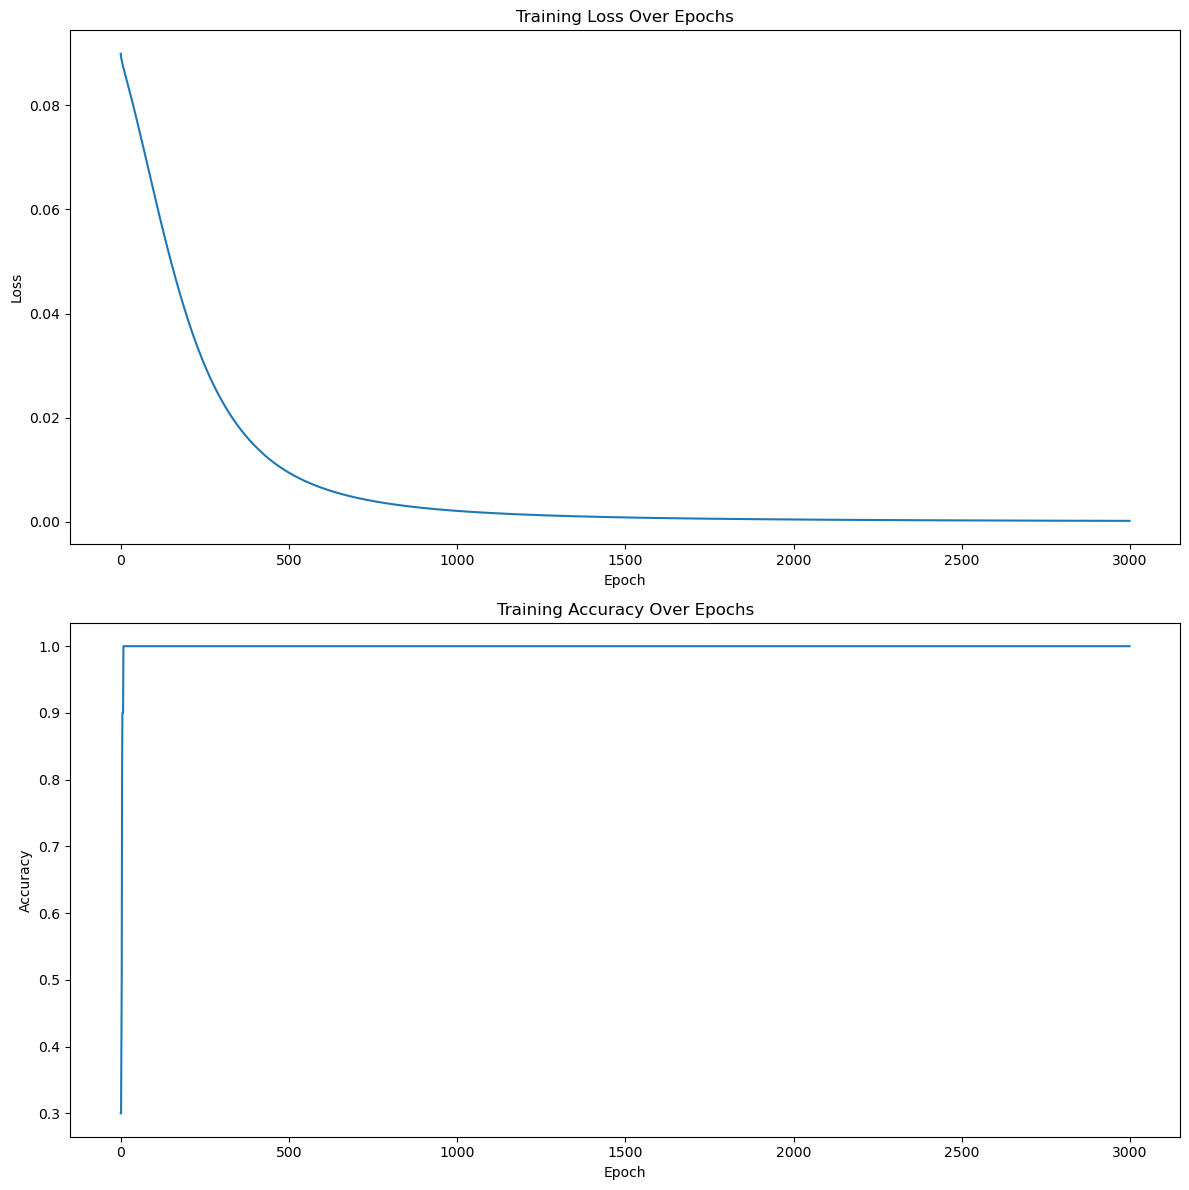

In [29]:
# 加載訓練數據
def load_training_data(folder_path, labels):
    data = []
    targets = []
    for label in labels:
        file_path = os.path.join(folder_path, f"{label:02}.npy")
        if os.path.exists(file_path):
            # 加載展平的圖像向量
            image_vector = np.load(file_path)
            data.append(image_vector)
            # 使用文件名稱的數字作為標籤
            targets.append(label)  # 不需要 -1
        else:
            print(f"File {file_path} does not exist.")
    # 將數據轉換為 NumPy 陣列
    data = np.array(data)
    targets = np.array(targets)
    # One-hot 編碼標籤
    num_classes = len(labels)
    targets_one_hot = np.eye(num_classes)[targets]
    return data, targets_one_hot

# 訓練數據文件夾和標籤
train_folder_path = "database02/train"
train_labels = list(range(0, 10))  # 假設文件名為 00.npy 到 09.npy，代表數字 0 到 9
# 加載訓練數據
X_train, y_train_one_hot = load_training_data(train_folder_path, train_labels)

# 初始化 MLP 模型
input_size = 54  # 9x6 展平為 54 維
hidden_size = 64  # 隱藏層神經元數
output_size = len(train_labels)  # 數字 0-9 共 10 類
mlp = MLP(input_size, hidden_size, output_size)

# 訓練模型並獲取損失和準確率
epochs = 3000
learning_rate = 0.01
losses, accuracies = mlp.train(X_train, y_train_one_hot, epochs, learning_rate)

# 繪製損失收斂圖
plt.figure(figsize=(12, 6))

# 損失收斂圖
# 繪製損失收斂圖和準確率隨時間變化圖
plt.figure(figsize=(12, 12))

# 損失收斂圖
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# 準確率隨時間變化圖
plt.subplot(2, 1, 2)
plt.plot(accuracies)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [30]:
# 加載測試數據
def load_test_data(folder_path, labels):
    data = []
    targets = []
    
    for label in labels:
        file_path = os.path.join(folder_path, f"{label:02}.npy")
        if os.path.exists(file_path):
            # 加載展平的圖像向量
            image_vector = np.load(file_path)
            data.append(image_vector)
            # 假設 00.npy 對應數字 0, 01.npy 對應數字 1，以此類推
            targets.append(label)
        else:
            print(f"File {file_path} does not exist.")
    
    # 將數據轉換為 NumPy 陣列
    data = np.array(data)
    targets = np.array(targets)
    
    # One-hot 編碼標籤
    num_classes = len(labels)
    targets_one_hot = np.eye(num_classes)[targets]
    
    return data, targets_one_hot

# 測試數據文件夾和標籤
test_folder_path = "database02/test"
test_labels = list(range(10))  # 假設文件名為 00.npy 到 09.npy，代表數字 0 到 9

# 加載測試數據
X_test, y_test_one_hot = load_test_data(test_folder_path, test_labels)

# 使用訓練好的 MLP 模型進行測試並獲得正確和錯誤分類的樣本
accuracy, correct_indices, incorrect_indices, predictions, true_labels = mlp.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print("\nCorrectly classified samples:")
# 列出正確分類的樣本
for idx in correct_indices:
    print(f"Sample {idx:02}: Predicted {predictions[idx]}, True Label {true_labels[idx]}")

print("\nIncorrectly classified samples:")
# 列出錯誤分類的樣本
for idx in incorrect_indices:
    print(f"Sample {idx:02}: Predicted {predictions[idx]}, True Label {true_labels[idx]}")

Test Accuracy: 60.00%

Correctly classified samples:
Sample 01: Predicted 1, True Label 1
Sample 04: Predicted 4, True Label 4
Sample 05: Predicted 5, True Label 5
Sample 06: Predicted 6, True Label 6
Sample 07: Predicted 7, True Label 7
Sample 09: Predicted 9, True Label 9

Incorrectly classified samples:
Sample 00: Predicted 3, True Label 0
Sample 02: Predicted 7, True Label 2
Sample 03: Predicted 8, True Label 3
Sample 08: Predicted 9, True Label 8


Test Accuracy: 60.00%

Test Accuracy is below 90%, no model saved.

Correctly classified samples:
Sample 01: Predicted 1, True Label 1
Sample 04: Predicted 4, True Label 4
Sample 05: Predicted 5, True Label 5
Sample 06: Predicted 6, True Label 6
Sample 07: Predicted 7, True Label 7
Sample 09: Predicted 9, True Label 9

Incorrectly classified samples:
Sample 00: Predicted 3, True Label 0
Sample 02: Predicted 7, True Label 2
Sample 03: Predicted 8, True Label 3
Sample 08: Predicted 9, True Label 8


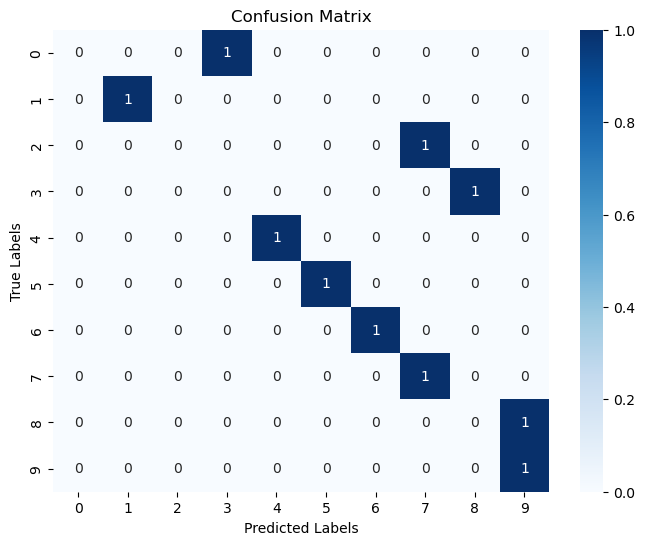

In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 加載測試數據
def load_test_data(folder_path, labels):
    data = []
    targets = []
    
    for label in labels:
        file_path = os.path.join(folder_path, f"{label:02}.npy")
        if os.path.exists(file_path):
            # 加載展平的圖像向量
            image_vector = np.load(file_path)
            data.append(image_vector)
            targets.append(label)
        else:
            print(f"File {file_path} does not exist.")
    
    # 將數據轉換為 NumPy 陣列
    data = np.array(data)
    targets = np.array(targets)
    
    # One-hot 編碼標籤
    num_classes = len(labels)
    targets_one_hot = np.eye(num_classes)[targets]
    
    return data, targets_one_hot

# 測試數據文件夾和標籤
test_folder_path = "database02/test"
test_labels = list(range(10))  # 假設文件名為 00.npy 到 09.npy，代表數字 0 到 9

# 加載測試數據
X_test, y_test_one_hot = load_test_data(test_folder_path, test_labels)

# 使用訓練好的 MLP 模型進行測試並獲得正確和錯誤分類的樣本
accuracy, correct_indices, incorrect_indices, predictions, true_labels = mlp.evaluate(X_test, y_test_one_hot)

# 輸出測試結果
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 檢查是否達到 90% 準確率
if accuracy >= 0.9:
    print("\nTest Accuracy is above 90%, saving model...")
    mlp.save_model("trained_model.npz")  # 保存模型權重
else:
    print("\nTest Accuracy is below 90%, no model saved.")

# 顯示正確分類的樣本
print("\nCorrectly classified samples:")
for idx in correct_indices:
    print(f"Sample {idx:02}: Predicted {predictions[idx]}, True Label {true_labels[idx]}")

# 顯示錯誤分類的樣本
print("\nIncorrectly classified samples:")
for idx in incorrect_indices:
    print(f"Sample {idx:02}: Predicted {predictions[idx]}, True Label {true_labels[idx]}")

# 混淆矩陣可視化
cm = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_labels, yticklabels=test_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [32]:
# 保存訓練好的模型，如果
# mlp.save_model("mlp_model.npz")

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

# 定義 MLP 模型
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_input)
        return self.output

    def backward(self, X, y, learning_rate):
        n_samples = X.shape[0]
        output_error = self.output - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error) / n_samples
        d_bias_output = np.sum(output_error, axis=0, keepdims=True) / n_samples
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(X.T, hidden_error) / n_samples
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True) / n_samples
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        train_losses, test_accuracies = [], []
        for epoch in range(epochs):
            # 前向傳播與損失計算
            self.forward(X_train)
            train_loss = np.mean(np.square(y_train - self.output))  # 使用 MSE 作為損失函數
            train_losses.append(train_loss)

            # 向後傳播並更新權重
            self.backward(X_train, y_train, learning_rate)
            
            # 計算測試集上的準確率
            test_accuracy = self.evaluate(X_test, y_test)
            test_accuracies.append(test_accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Train Loss (MSE): {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return train_losses, test_accuracies


    def evaluate(self, X, y):
        predictions = np.argmax(self.forward(X), axis=1)
        true_labels = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == true_labels)
        return accuracy

# 加載數據函數
def load_data(folder_path, labels):
    data, targets = [], []
    for label in labels:
        file_path = os.path.join(folder_path, f"{label:02}.npy")
        if os.path.exists(file_path):
            image_vector = np.load(file_path)
            data.append(image_vector)
            targets.append(label)
    data, targets = np.array(data), np.array(targets)
    num_classes = len(labels)
    targets_one_hot = np.eye(num_classes)[targets]
    return data, targets_one_hot

# 訓練和測試數據
train_folder_path = "database02/train"
test_folder_path = "database02/test"
labels = list(range(10))

X_train, y_train = load_data(train_folder_path, labels)
X_test, y_test = load_data(test_folder_path, labels)

# 初始化並訓練 MLP 模型
input_size = 54  # 9x6 展平為 54 維
hidden_size = 64  # 隱藏層神經元數
output_size = 10  # 數字 0-9 共 10 類
mlp = MLP(input_size, hidden_size, output_size)

# 訓練並記錄損失和準確率
epochs = 3000
learning_rate = 0.01
train_losses, test_accuracies = mlp.train(X_train, y_train, X_test, y_test, epochs, learning_rate)

# 繪製損失收斂圖和測試集準確率
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


TypeError: MLP.train() takes 5 positional arguments but 7 were given

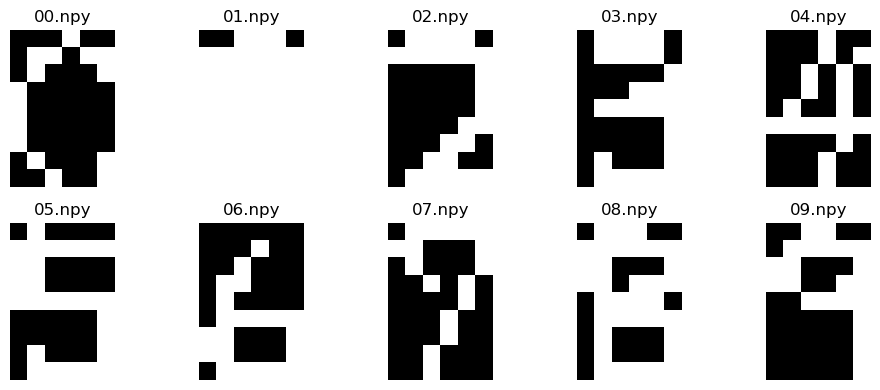

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定義文件夾路徑
folder_path = "database02/train"

# 創建一個子圖，兩行並排顯示 00.npy 到 09.npy 的圖像
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 行 5 列

for i in range(10):
    file_path = os.path.join(folder_path, f"{i:02}.npy")
    ax = axes[i // 5, i % 5]  # 確定子圖的位置
    
    if os.path.exists(file_path):
        # 加載展平的圖像數據
        loaded_data = np.load(file_path)
        
        # 重塑數據為 9x6 圖像格式
        reshaped_image = loaded_data.reshape((9, 6))
        
        # 顯示圖像
        ax.imshow(reshaped_image, cmap='gray')
        ax.set_title(f"{i:02}.npy")
        ax.axis("off")  # 隱藏坐標軸
    else:
        print(f"File {file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()

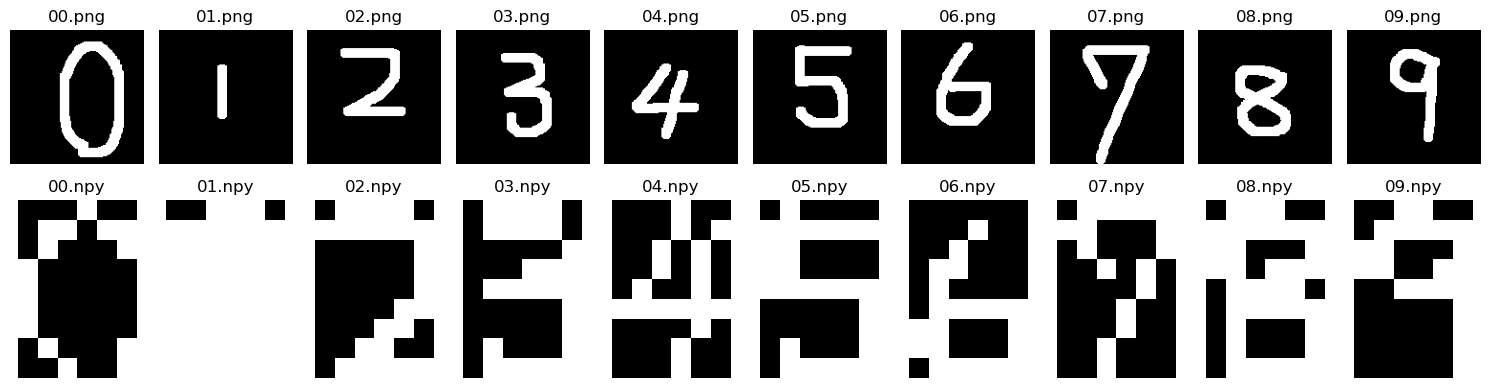

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# 定義文件夾路徑
npy_folder_path = "database02/train"  # .npy 文件夾
png_folder_path = "database02"         # .png 文件夾

# 創建一個子圖，三行並排顯示 00.npy 到 09.npy 的圖像和相應的原始圖像
fig, axes = plt.subplots(2, 10, figsize=(15, 4))  # 兩行：第一行顯示原始 PNG，第二行顯示 NPY

for i in range(10):
    # 加載 .npy 文件
    npy_file_path = os.path.join(npy_folder_path, f"{i:02}.npy")
    ax_npy = axes[1, i]  # NPY 圖片顯示在第二行
    
    if os.path.exists(npy_file_path):
        loaded_data = np.load(npy_file_path)
        reshaped_image = loaded_data.reshape((9, 6))
        ax_npy.imshow(reshaped_image, cmap='gray')
        ax_npy.set_title(f"{i:02}.npy")
        ax_npy.axis("off")
    else:
        print(f"File {npy_file_path} does not exist.")

    # 加載 .png 文件
    png_file_path = os.path.join(png_folder_path, f"{i:02}.png")
    ax_png = axes[0, i]  # PNG 圖片顯示在第一行

    if os.path.exists(png_file_path):
        img = Image.open(png_file_path).convert("L")  # 轉換為灰階
        ax_png.imshow(img, cmap='gray')
        ax_png.set_title(f"{i:02}.png")
        ax_png.axis("off")
    else:
        print(f"File {png_file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()


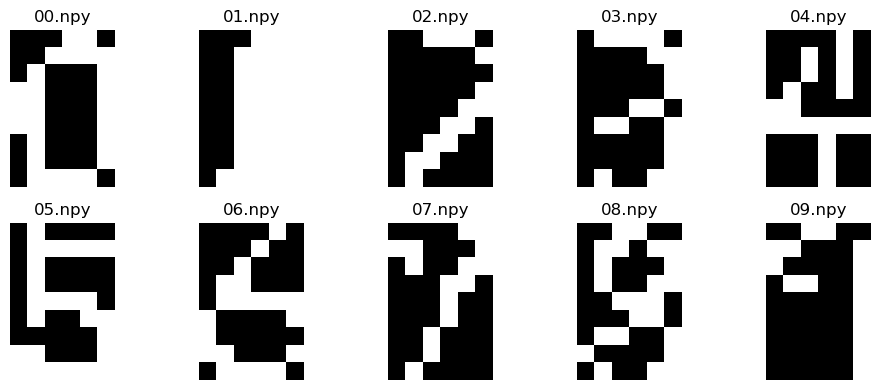

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定義文件夾路徑
folder_path = "database02/test"

# 創建一個子圖，兩行並排顯示 00.npy 到 09.npy 的圖像
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 行 5 列

for i in range(10):
    file_path = os.path.join(folder_path, f"{i:02}.npy")
    ax = axes[i // 5, i % 5]  # 確定子圖的位置
    
    if os.path.exists(file_path):
        # 加載展平的圖像數據
        loaded_data = np.load(file_path)
        
        # 重塑數據為 9x6 圖像格式
        reshaped_image = loaded_data.reshape((9, 6))
        
        # 顯示圖像
        ax.imshow(reshaped_image, cmap='gray')
        ax.set_title(f"{i:02}.npy")
        ax.axis("off")  # 隱藏坐標軸
    else:
        print(f"File {file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()

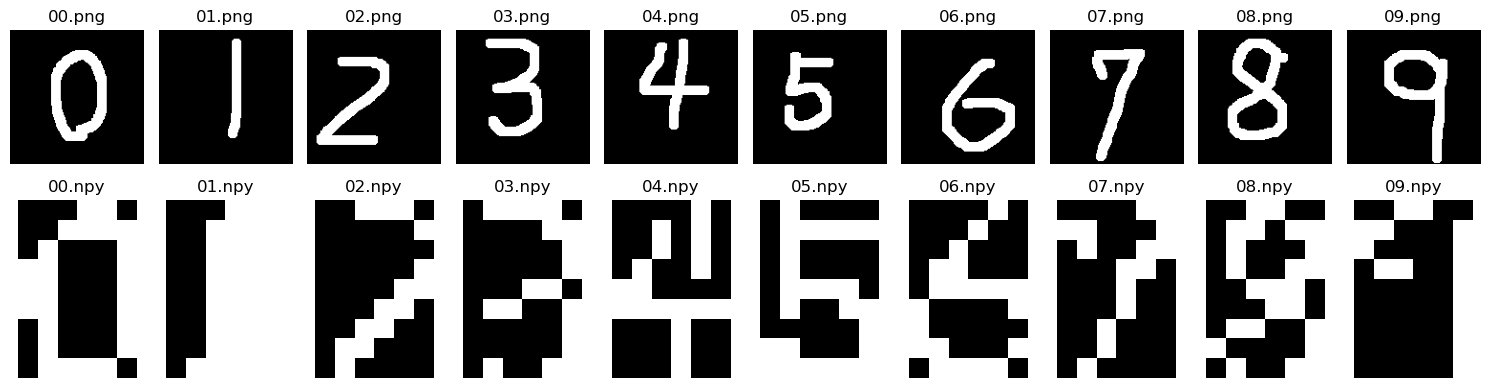

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# 定義文件夾路徑
npy_folder_path = "database02/test"  # .npy 文件夾
png_folder_path = "database02"         # .png 文件夾

# 創建一個子圖，三行並排顯示 00.npy 到 09.npy 的圖像和相應的原始圖像
fig, axes = plt.subplots(2, 10, figsize=(15, 4))  # 兩行：第一行顯示原始 PNG，第二行顯示 NPY

for i in range(10):
    # 加載 .npy 文件
    npy_file_path = os.path.join(npy_folder_path, f"{i:02}.npy")
    ax_npy = axes[1, i]  # NPY 圖片顯示在第二行
    
    if os.path.exists(npy_file_path):
        loaded_data = np.load(npy_file_path)
        reshaped_image = loaded_data.reshape((9, 6))
        ax_npy.imshow(reshaped_image, cmap='gray')
        ax_npy.set_title(f"{i:02}.npy")
        ax_npy.axis("off")
    else:
        print(f"File {npy_file_path} does not exist.")

    # 加載 .png 文件
    png_file_path = os.path.join(png_folder_path, f"{i:02}_02.png")
    ax_png = axes[0, i]  # PNG 圖片顯示在第一行

    if os.path.exists(png_file_path):
        img = Image.open(png_file_path).convert("L")  # 轉換為灰階
        ax_png.imshow(img, cmap='gray')
        ax_png.set_title(f"{i:02}.png")
        ax_png.axis("off")
    else:
        print(f"File {png_file_path} does not exist.")

# 調整布局並顯示所有圖像
plt.tight_layout()
plt.show()
